# Interpolation of data
- Börge Göbel

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Taylor expansion

You can expand any continuous function as a polynomials

$ f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n $

Here, $ f^{(n)} $ is the nth derivative and $ x_0 $ is the argument around which we expand the function

### 1.1 Example: Exponential function

$ f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) $

In [160]:
def expTaylor(x, x0, nmax):
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**n / math.factorial(n)
    return t
    

In [161]:
expTaylor(1, 0, 10)

2.7182818011463845

In [162]:
np.exp(1)

2.718281828459045

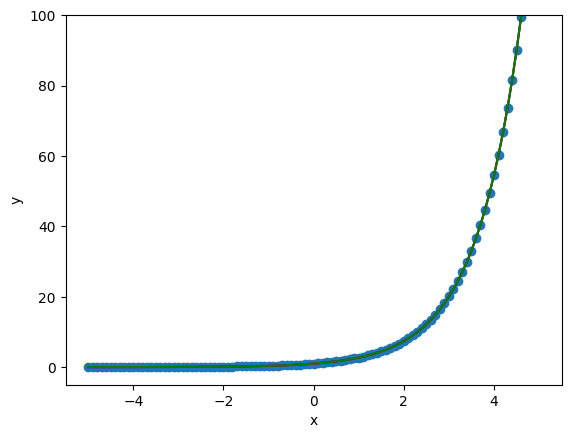

In [163]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-5,100])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

nmax = 20
plt.plot(x_list, expTaylor(x_list, 0, nmax), "blue")
plt.plot(x_list, expTaylor(x_list, -3, nmax), "red")
plt.plot(x_list, expTaylor(x_list, 2, nmax), "green")

### 1.2 Example: sin function at $x_0 = 0$

$ f(0) = f''(0) = f^{(4)}(0) = \dots = 0 $

$ f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 $

$ f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 $

$ \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}$

In [164]:
def sinTaylor(x, nmax):
    # x: Argument
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + (-1)**n * x**(2*n+1) / math.factorial(2*n+1)
    return t

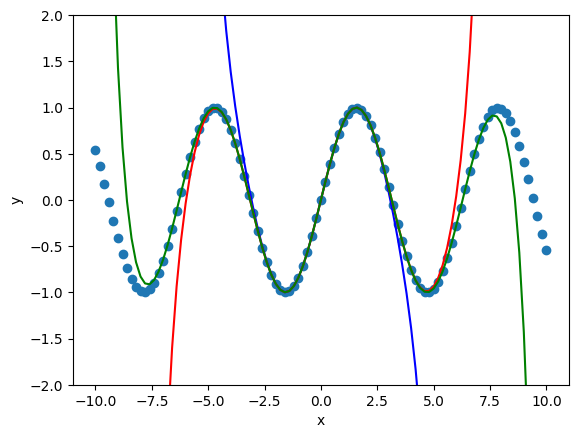

In [165]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-2, 2])

x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 3), "blue")
plt.plot(x_list, sinTaylor(x_list, 6), "red")
plt.plot(x_list, sinTaylor(x_list, 9), "green")

- Accuracy of $ \sin(10.5) $

In [166]:
np.sin(10.5) 

-0.87969575997167

In [167]:
sinTaylor(10.5, 50)

-0.8796957599713856

In [168]:
np.sin(10.5) - sinTaylor(10.5, 50)

-2.844391389089651e-13

### 1.3 Implementation of a general function

Derivative (more details in separate section): $ f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} $

In [169]:
def derivative(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return (f(x+h) - f(x)) / h

In [170]:
def func(x):
    return 2*np.sin(x)**2 + x

In [171]:
x0 = 10.5
h = 0.1

In [172]:
func(x0)

12.04772926022427

In [173]:
derivative(func, x0, h)

2.5529969724111723

Higher derivatives: $ f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)$

In [174]:
def nDerivative(f, x, h, n):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    # n: nth derivative
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * math.factorial(n) / (math.factorial(k) * math.factorial(n-k)) * f(x + k*h)
    return t / h**n

In [175]:
nDerivative(func, x0, h, 0)

12.04772926022427

In [176]:
nDerivative(func, x0, h, 1)

2.5529969724111723

In [177]:
nDerivative(func, x0, h, 2)

-2.802754599797907

### From before:
You can expand any continuous function as a polynomials

$ f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n $

Here, $ f^{(n)} $ is the nth derivative and $ x_0 $ is the argument around which we expand the function

In [178]:
def taylor(f, x, x0, nmax, h):
    # f: Function
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    # h: Stepsize
    t = 0
    for n in range(nmax+1):
        t = t + nDerivative(f,x0, h, n) * (x-x0)**n / math.factorial(n)
    return t

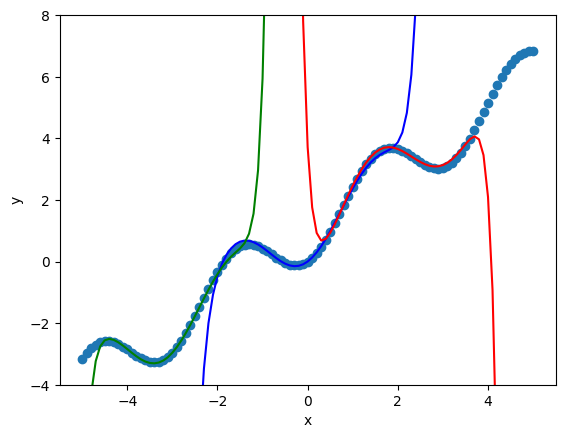

In [179]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-4, 8])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), "blue")
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), "red")
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), "green")

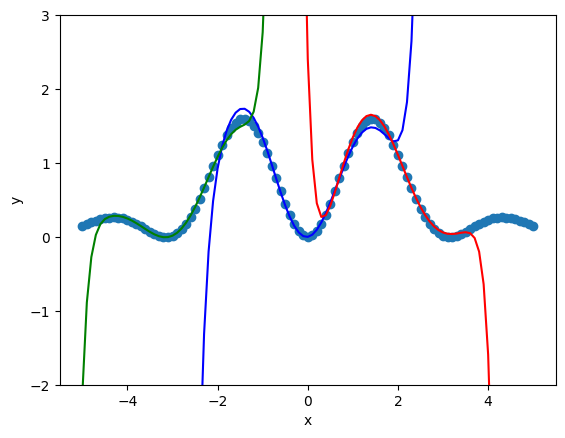

In [180]:
def func(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)

plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-2, 3])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), "blue")
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), "red")
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), "green")

## 2. Interpolation

### 2.1 Generate data points

In [181]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [182]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])

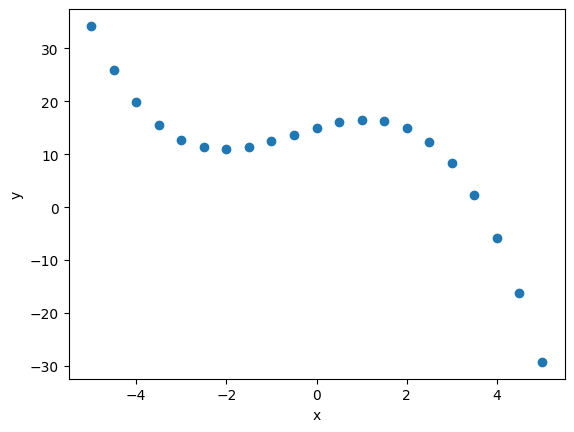

In [183]:
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(data0[0], data0[1])

Modify x and y values by adding random numbers

In [184]:
0.1 * (2*np.random.rand(npoints)-1)

array([ 0.02975229,  0.08434216, -0.03272599,  0.08169533, -0.03832296,
       -0.09672212, -0.05629839, -0.03171934,  0.04317686, -0.00981399,
       -0.01663158, -0.03894596, -0.09953727, -0.08262199,  0.01109216,
        0.05680137,  0.02930189,  0.07219834, -0.02219729,  0.06504325,
       -0.02329229])

In [185]:
data = np.array([x_list + 0.25 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])

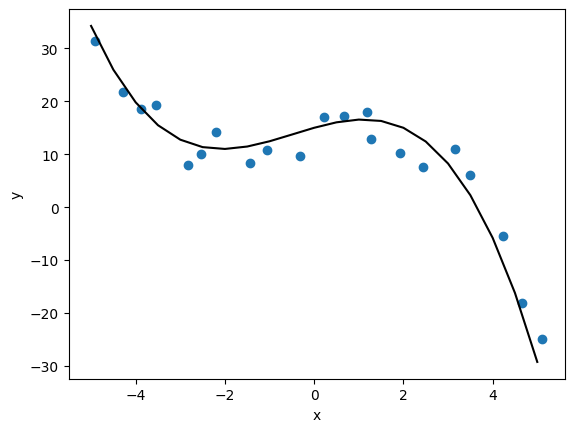

In [186]:
plt.xlabel("x")
plt.ylabel("y")

plt.plot(data0[0], data0[1], "black")
plt.scatter(data[0], data[1])

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

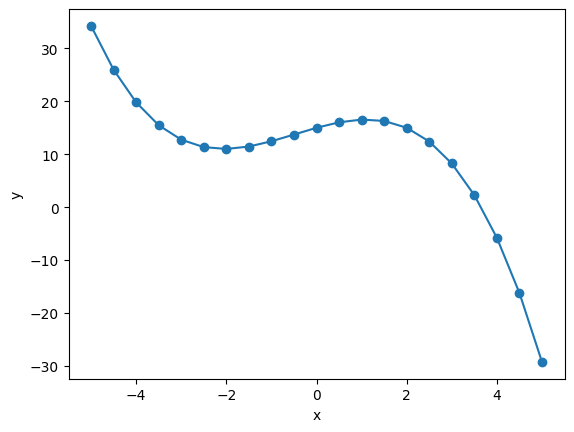

In [187]:
plt.xlabel("x")
plt.ylabel("y")

plt.plot(data0[0], data0[1])
plt.scatter(data0[0], data0[1])

In [188]:
from scipy import interpolate

- linear splines

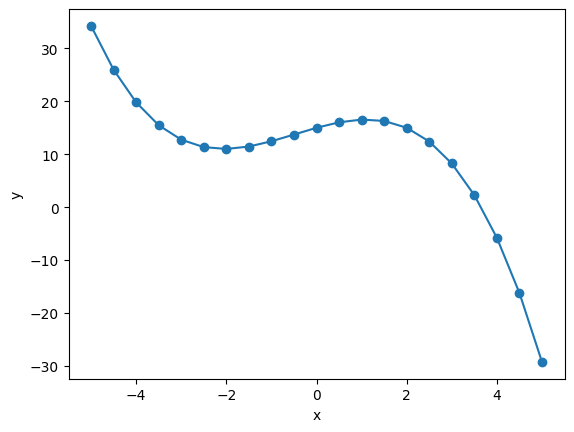

In [189]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind="linear")

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

- zoom

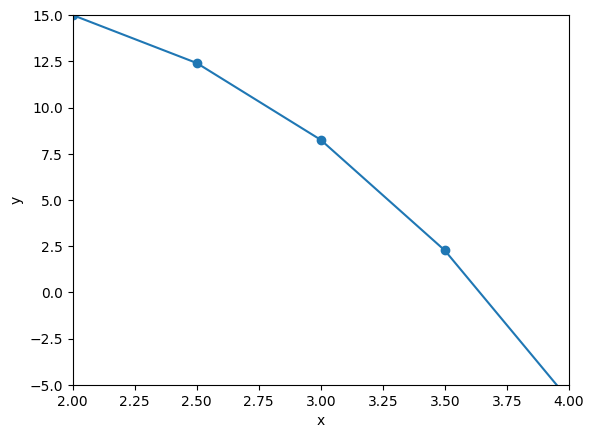

In [190]:
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

- cubic spline

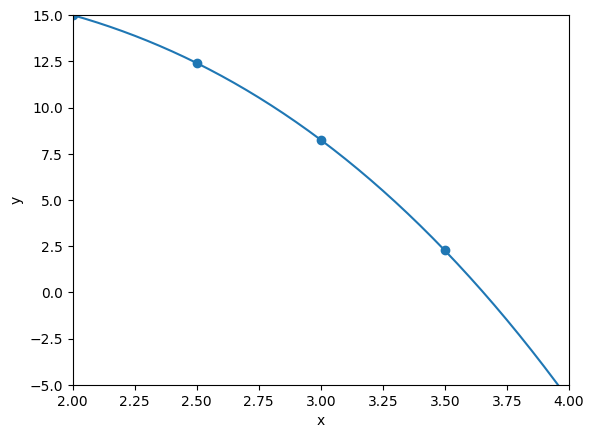

In [191]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind="cubic")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))

### 2.2.2 Perturbed data

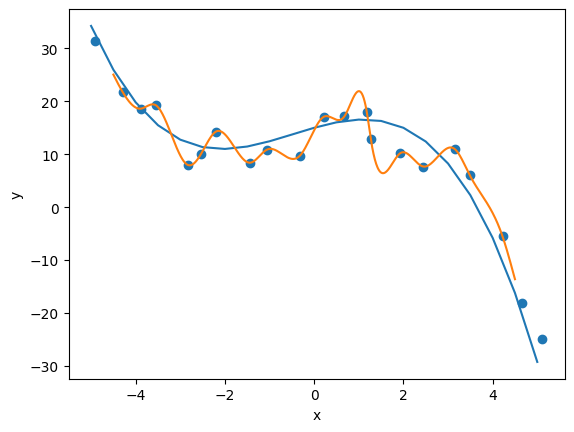

In [192]:
splineCubic = interpolate.interp1d(data[0], data[1], kind="cubic")

plt.xlabel("x")
plt.ylabel("y")

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list))

- How to handle data which is not smooth?

In [193]:
splineSmooth = interpolate.UnivariateSpline(data[0],data[1])
splineSmooth.set_smoothing_factor(500)

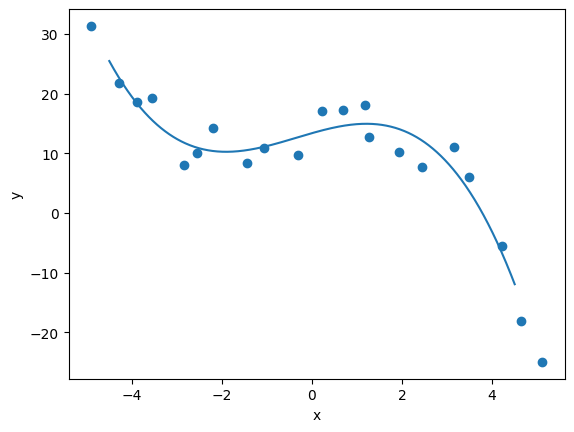

In [194]:
plt.xlabel("x")
plt.ylabel("y")

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list))

In [195]:
datapoly = data[:,7:14]

In [196]:
datapoly

array([[-1.43462269, -1.05812593, -0.31872636,  0.21717521,  0.67827543,
         1.17784828,  1.27084883],
       [ 8.39851473, 10.8705313 ,  9.73516921, 17.08696807, 17.17287882,
        18.04271424, 12.78660352]])

In [197]:
x = np.transpose(
        np.array(
            [datapoly[0,:]**0, datapoly[0,:]**1, datapoly[0,:]**2, datapoly[0,:]**3, datapoly[0,:]**4, datapoly[0,:]**5, datapoly[0,:]**6]
        )
    )

In [198]:
x

array([[ 1.00000000e+00, -1.43462269e+00,  2.05814227e+00,
        -2.95265761e+00,  4.23594961e+00, -6.07698943e+00,
         8.71818694e+00],
       [ 1.00000000e+00, -1.05812593e+00,  1.11963049e+00,
        -1.18471006e+00,  1.25357244e+00, -1.32643751e+00,
         1.40353793e+00],
       [ 1.00000000e+00, -3.18726362e-01,  1.01586494e-01,
        -3.23782937e-02,  1.03198158e-02, -3.28919734e-03,
         1.04835390e-03],
       [ 1.00000000e+00,  2.17175213e-01,  4.71650730e-02,
         1.02430848e-02,  2.22454412e-03,  4.83115842e-04,
         1.04920786e-04],
       [ 1.00000000e+00,  6.78275434e-01,  4.60057565e-01,
         3.12045744e-01,  2.11652963e-01,  1.43559005e-01,
         9.73725466e-02],
       [ 1.00000000e+00,  1.17784828e+00,  1.38732658e+00,
         1.63406023e+00,  1.92467504e+00,  2.26697519e+00,
         2.67015284e+00],
       [ 1.00000000e+00,  1.27084883e+00,  1.61505674e+00,
         2.05249296e+00,  2.60840827e+00,  3.31489258e+00,
         4.2127273

In [199]:
y = datapoly[1,:]

In [200]:
a = np.linalg.solve(x,y)

In [201]:
a 

array([ 15.68893975,  11.96113081, -26.43250738,  -4.01135709,
        40.89749723,  -2.47611794, -15.58352664])

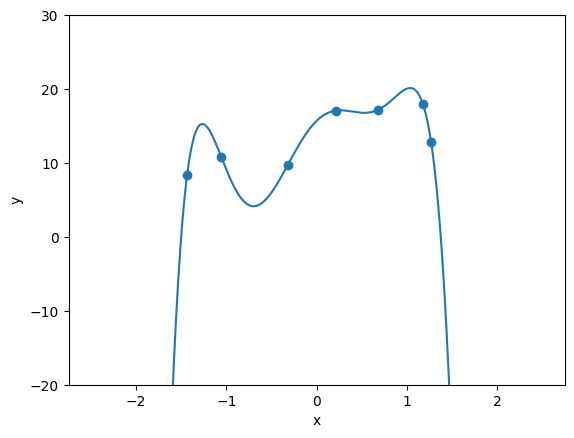

In [202]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-20,30])

x_list = np.linspace(-2.5, 2.5, 901)
y_list = a[0]*x_list**0 + a[1]*x_list**1 + a[2]*x_list**2 + a[3]*x_list**3 + a[4]*x_list**4 + a[5]*x_list**5 + a[6]*x_list**6
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_list)

### Exercise (optional) Generalize the procedure for more data points
In the previous video we have used a higher-order polynomial to interpolate data points. For simplicity, we  used 7 data points and a 6th order polynomial. Can you generalize the procedure to fit, let's say, 20 or more data points?

In [203]:
def polydataFit(data):
    x = np.array([])
    npoints = np.shape(data)[1]
    for n in range(0, npoints):
        x = np.append(x,[data[0,:]**n])
        
    # x = np.transpose(x)
    x = np.reshape(x, (npoints,npoints), "F")
    y = data[1,:]

    a = np.linalg.solve(x,y)
    return a

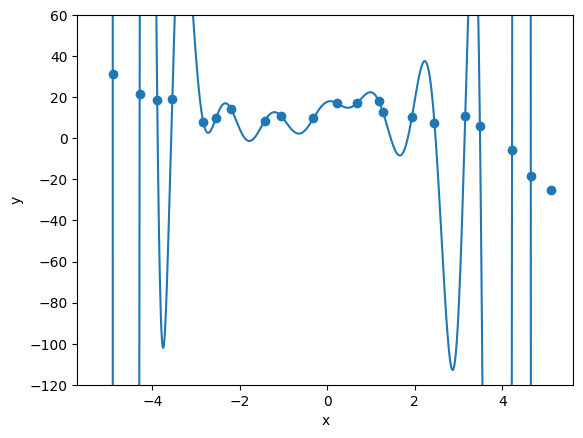

In [204]:
a = polydataFit(data)

plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-120,60])

x_list = np.linspace(-5.2,5.1,901)
y_list = 0
for n in range(npoints):
    y_list = y_list + a[n]*x_list**n

plt.scatter(data[0], data[1])
plt.plot(x_list, y_list)

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: $ f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k$

In [205]:
def polynomialModel(x,a):
    t = 0
    for k in range(len(a)):
        t = t + a[k]* x**k
    return t

In [206]:
a0 = np.array([15, 2.4, -0.5, -0.35])
a1 = np.array([1, 1, 1, 1])

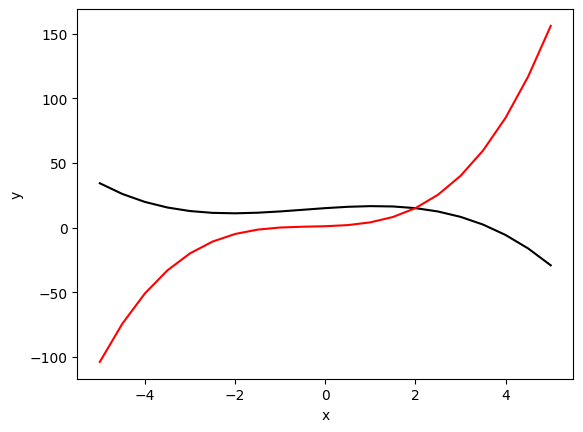

In [207]:
plt.xlabel("x")
plt.ylabel("y")

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a0), "black")
plt.plot(x_list, polynomialModel(x_list, a1), "red")

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: $ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2$

$ f $ is the fit function that is determined by the coefficients $ a_i $ in our case.

$ (x_i, y_i) $ are the data points that we try to fit.

In [208]:
def errorFit(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    error = 0
    for i in range(len(data[0])):
        error = error + (data[1,i] - f(data[0,i], coefficients))**2
    return error

In [209]:
errorFit(polynomialModel, a0, data)

258.1513206248311

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients $ a_i $ will be updated along the gradient direction of the error function $ \nabla_{\vec{a}} \Delta$. The gradient consists of elements $ \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}$

In [210]:
def errorFitGradient(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

In [211]:
errorFitGradient(polynomialModel, a0, data)

array([-2.17956891e+00, -1.65275460e+02, -5.95833622e+02, -3.73405718e+03])

### 2.3.4 Loop for the actual fitting

In [212]:
iterations = 100000
h = 0.00001
a = 2*np.random.rand(4)-1

print(a)

for i in range(iterations):
    a = a - h*errorFitGradient(polynomialModel, a, data)

[-0.05910462 -0.31826589 -0.58622624 -0.82197631]


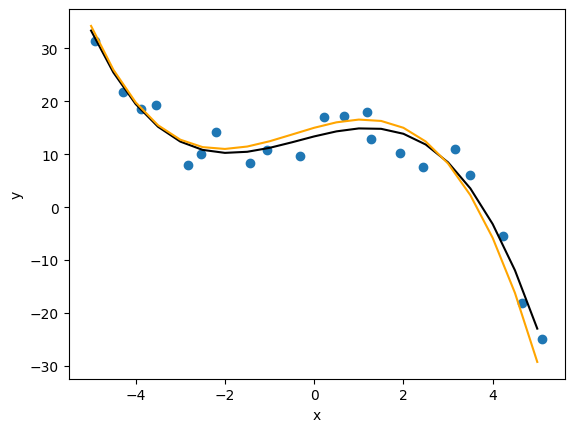

In [213]:
plt.xlabel("x")
plt.ylabel("y")

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a), "black")
plt.plot(x_list, polynomialModel(x_list, a0), "orange")
plt.scatter(data[0], data[1])


In [215]:
print(errorFit(polynomialModel, a, data))
print(errorFit(polynomialModel, a0, data))

156.70332789159085
258.1513206248311


- Comparison of a and a0

In [216]:
print(a)
print(a0)

[13.36855067  2.14727848 -0.3265323  -0.31120503]
[15.    2.4  -0.5  -0.35]
